<a href="https://colab.research.google.com/github/UtkarshAIITB/Summer_Telfer/blob/main/Notebooks/correlation_tone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip3 install pymupdf
!pip3 install textatistic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
!apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [48]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import fitz
from textatistic import Textatistic
from pdf2image import convert_from_path

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
import textatistic

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [57]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1KYveNDeIBbdUasxyo8JLlS7vDWAlF5jJVW5uNmA2nv0/edit#gid=0'
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(url_1)
df.head()

,Company,Tone_sum,Tone_avg,Y,Flesch score
0,Advance Powerinfra Tech Ltd..pdf,1.033636,0.172273,1,46.427882
1,Anil Ltd..pdf,1.514416,0.216345,1,45.560032
2,Aplaya Creations Ltd..pdf,0.166429,0.015130,1,55.182292
3,Automobile Products Of India Ltd..pdf,1.800000,0.900000,1,59.756524
4,B P L Engineering Ltd..pdf,1.555168,0.259195,1,48.003464


In [53]:
def data(path):
  pages = convert_from_path(path, 350)
  text = ''
  i = 1
  for page in pages:
    extractedInformation = pytesseract.image_to_string(page)
      # print(extractedInformation)
    text = text + extractedInformation
  text = text.replace('\n', ' ')
  text = textatistic.punct_clean(text)
  word_list = textatistic.word_array(text, prepped=True)
  params = {}
  params['sent_count'] = textatistic.sent_count(text, prepped=True)
  params['sybl_count'] = textatistic.sybl_counts(word_list, prepped=True)['sybl_count']
  params['word_count'] = textatistic.word_count(word_list, prepped=True)
  return params

In [54]:
f_df = pd.DataFrame(columns = ['Company', 'flesh_score'])

In [55]:
import os
basepath = '/content/drive/MyDrive/Telfer/bankrupt/'
for filename in os.listdir(basepath):
  if filename.endswith('.pdf'):
    # print(os.path.join("/content/drive/MyDrive/prowess/", filename))
    fin = data(os.path.join("/content/drive/MyDrive/Telfer/bankrupt/", filename))
    s = textatistic.flesch_score(vars=fin)
    new_row = {'Company': filename, 'flesh_score': s }
    f_df = f_df.append(new_row, ignore_index=True)

In [58]:
# f_df

In [59]:
df.head()

,Company,Tone_sum,Tone_avg,Y,Flesch score
0,Advance Powerinfra Tech Ltd..pdf,1.033636,0.172273,1,46.427882
1,Anil Ltd..pdf,1.514416,0.216345,1,45.560032
2,Aplaya Creations Ltd..pdf,0.166429,0.015130,1,55.182292
3,Automobile Products Of India Ltd..pdf,1.800000,0.900000,1,59.756524
4,B P L Engineering Ltd..pdf,1.555168,0.259195,1,48.003464


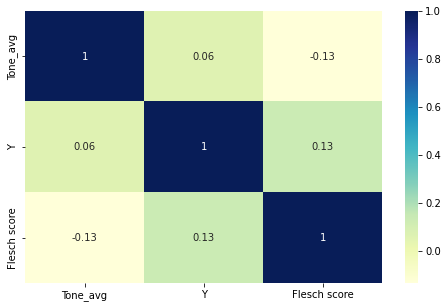

In [60]:
corre = df.drop(columns = ['Company', 'Tone_sum'])
plt.figure(figsize=(8,5))
sns.heatmap(corre.corr() ,cmap="YlGnBu",annot=True)

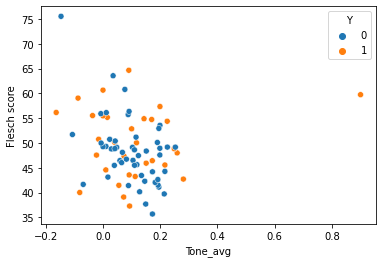

In [62]:
sns.scatterplot(x = 'Tone_avg', y = 'Flesch score', hue = 'Y', data = df)

## Inferences:
No high correlations found with respect to tone or flesch score